<a href="https://colab.research.google.com/github/santipop1/AdvancedIA/blob/main/SegundoBloque/Notebook_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


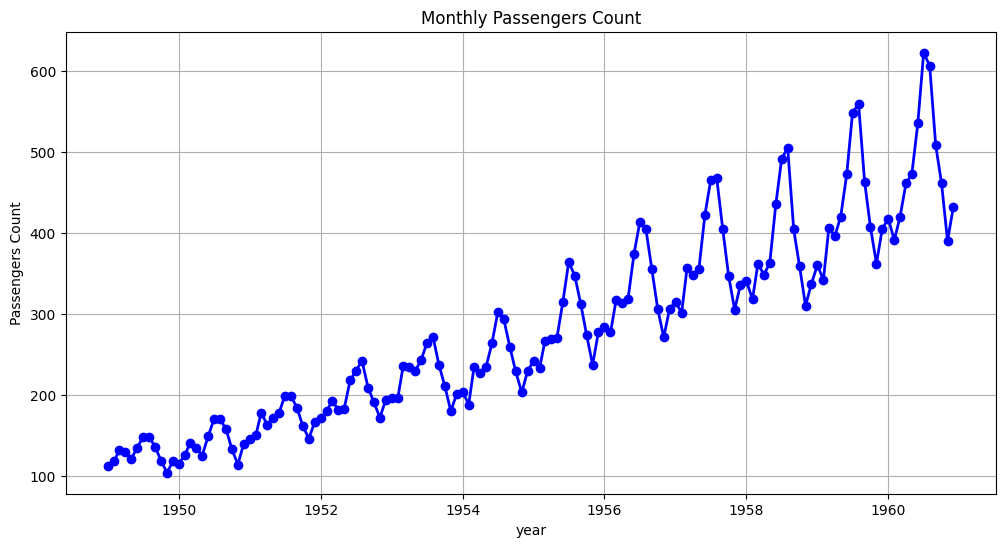

In [ ]:
#Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle ='-', linewidth=2, markersize=6)
plt.title('Monthly Passengers Count')
plt.xlabel('year')
plt.ylabel('Passengers Count')
plt.grid(True)
plt.show()

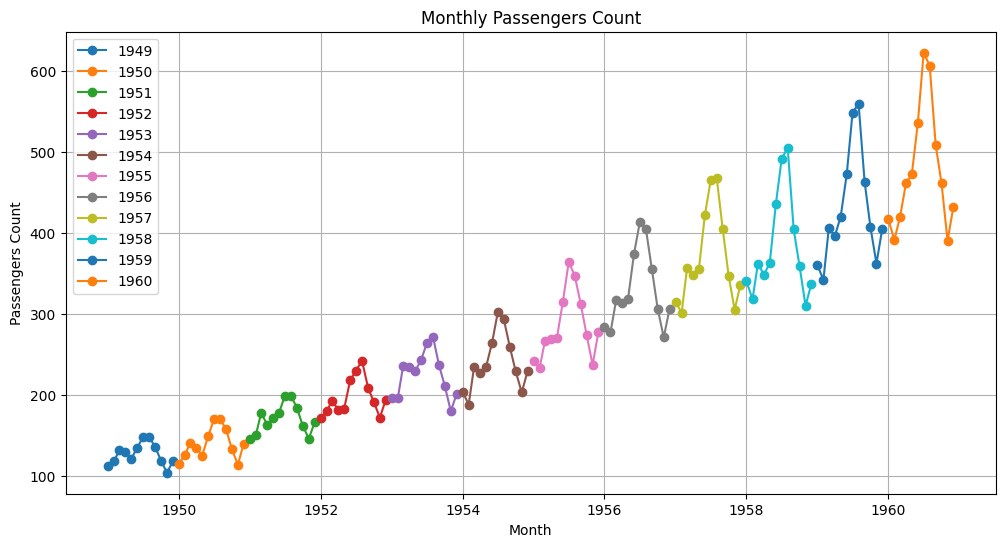

In [ ]:
years = df.index.year.unique()


plt.figure(figsize=(12,6))
for year in years:
    year_data = df[df.index.year == year]
    plt.plot(year_data, marker='o', linestyle='-', label=f'{year}')

plt.title('Monthly Passengers Count')
plt.xlabel('Month')
plt.ylabel('Passengers Count')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-4169817343.py:4: FutureWarning: The provided callable <function sum at 0x791d61963100> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table= pd.pivot_table(df, values='Passengers', index=['month'], columns='Year', aggfunc=np.sum)


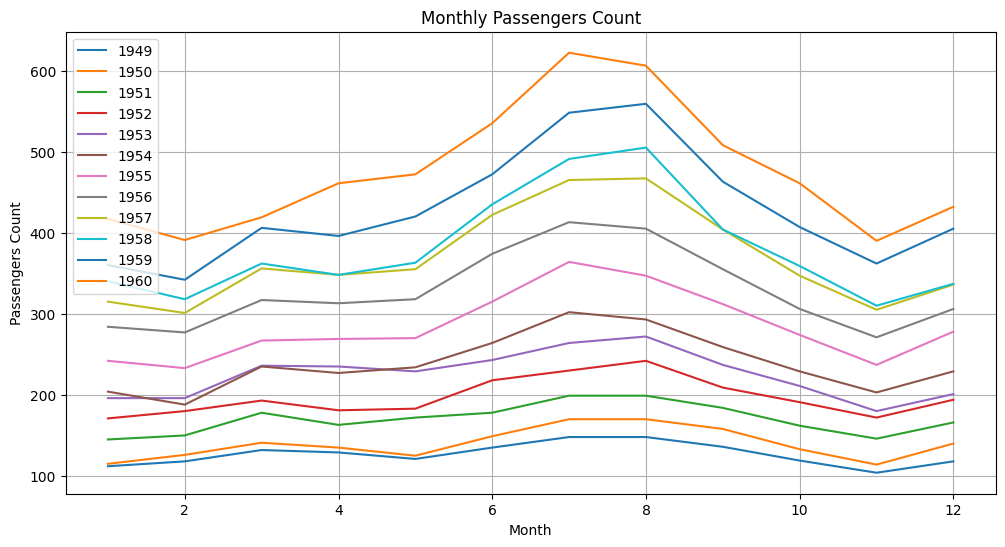

In [ ]:
df['Year'] = df.index.year
df['month'] = df.index.month

table= pd.pivot_table(df, values='Passengers', index=['month'], columns='Year', aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind = 'line')
plt.title('Monthly Passengers Count')
plt.xlabel('Month')
plt.ylabel('Passengers Count')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2801575955.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


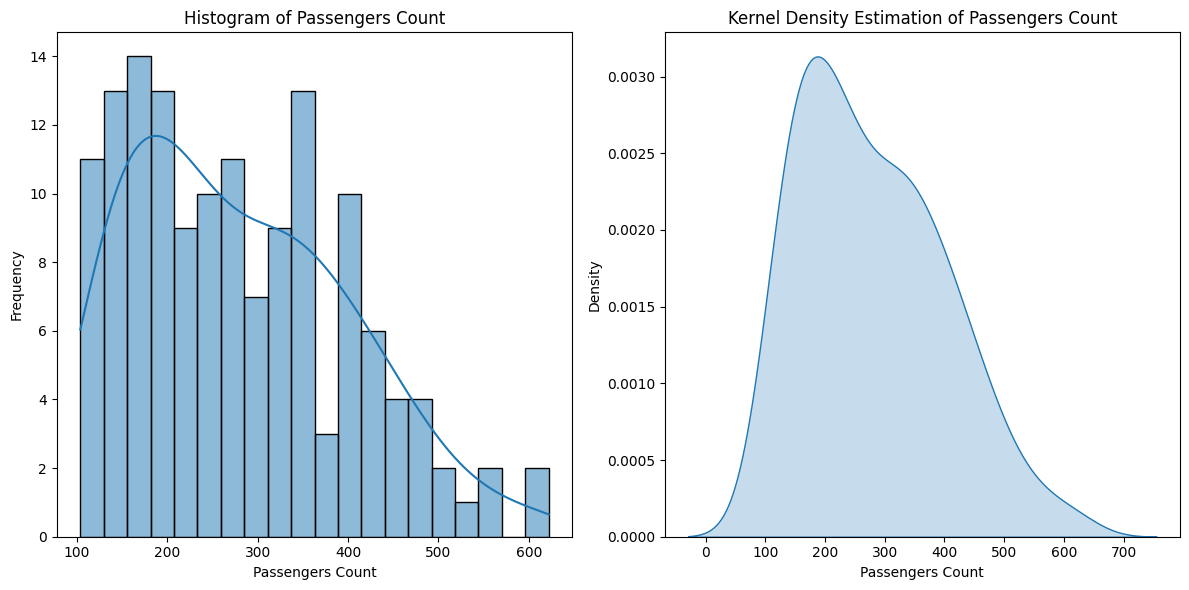

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Passengers'], bins = 20, kde =True)
plt.title('Histogram of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Kernel Density Estimation of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series

In [ ]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys,[res[0], res[1], res[3], res[4], res[5]]))

def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test_stat": stat, "pvalue": pval, "lags": lags, "crit_values": crit, "regression": regression}

def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistic: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS test failed")

def rolling_mean_var(s, window=24, title="Rolling Mean & Var"):
  rolling_mean = s.rolling(window).mean()
  rolling_var = s.rolling(window).var()
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + "- mean")
  ax[1].plot(rolling_var, label="Rolling Var")
  ax[1].legend()
  ax[1].set_title(title + "- var")
  plt.show()


In [ ]:
n = 240
t = np.arange(n)

#stationary: white noise
white_noise=pd.Series(np.random.normal(0,1,n))

#Non-stationary
trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0,1,n))


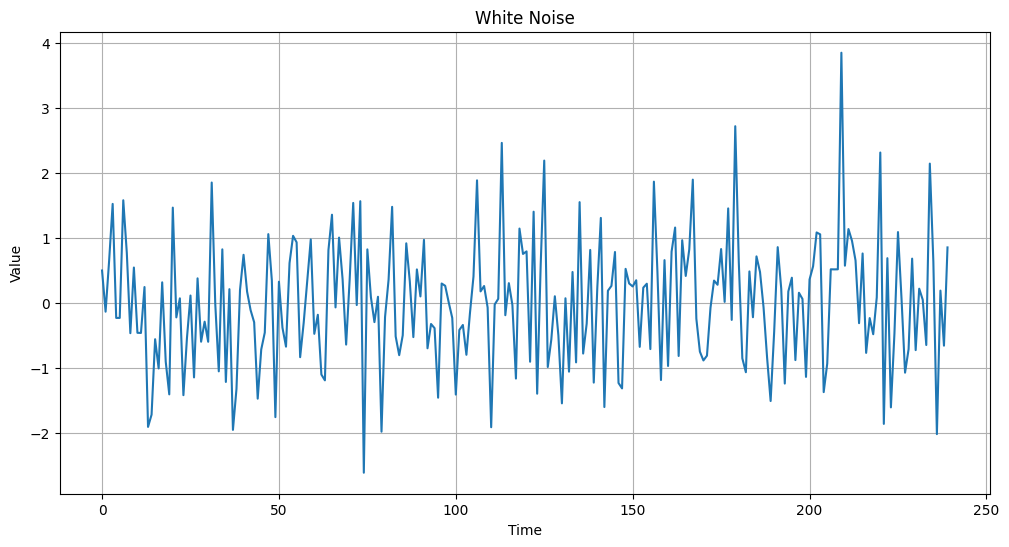

Test White Noise
ADF Statistic: -16.112 p=5.006520467194035e-29
KPSS: stat=0.298 p=0.1


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


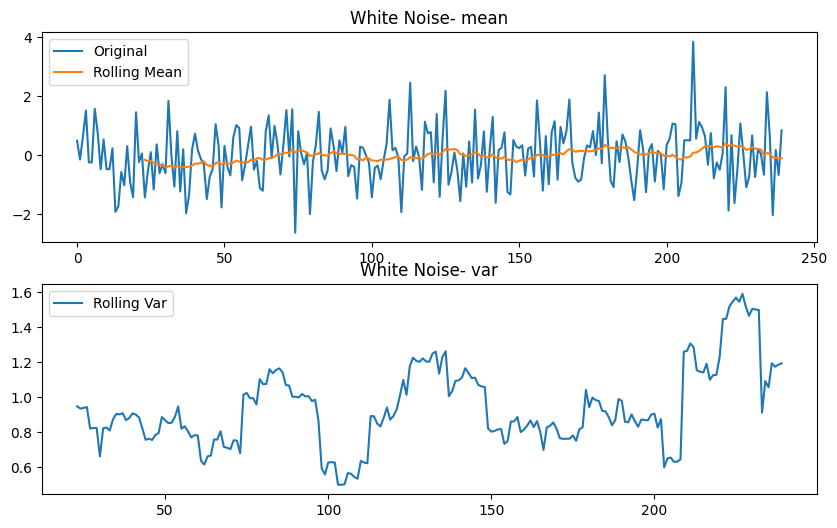

In [ ]:
plot_series(white_noise,"White Noise")
print_test(white_noise,"White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")


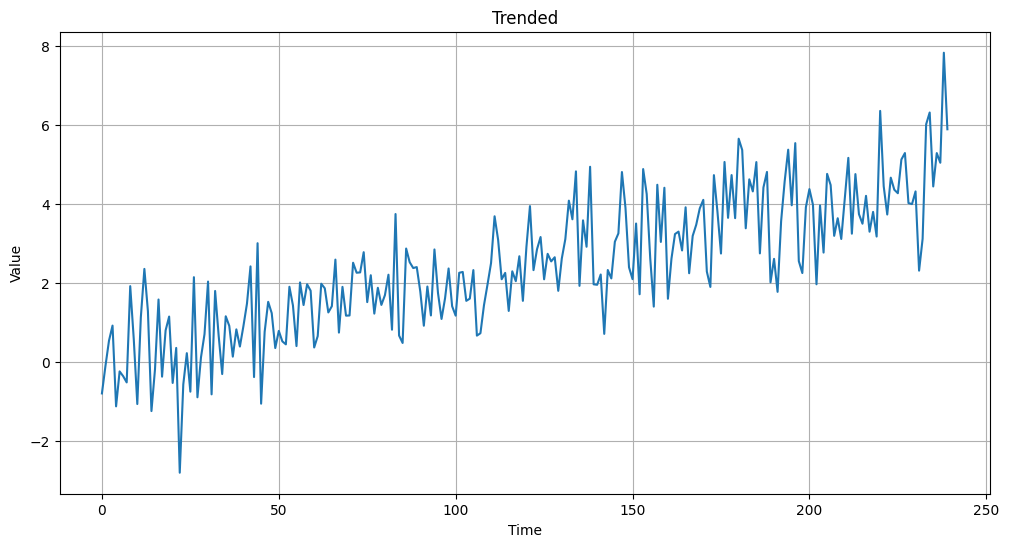

Test Trended
ADF Statistic: -0.057 p=0.9535945013089667
KPSS: stat=2.416 p=0.01


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


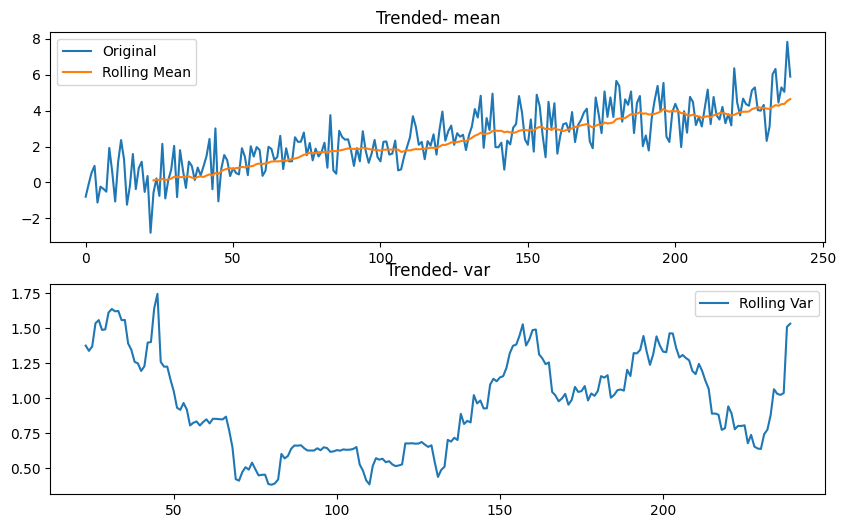

In [ ]:
plot_series(trended,"Trended")
print_test(trended,"Trended")
rolling_mean_var(trended, window=24, title="Trended")

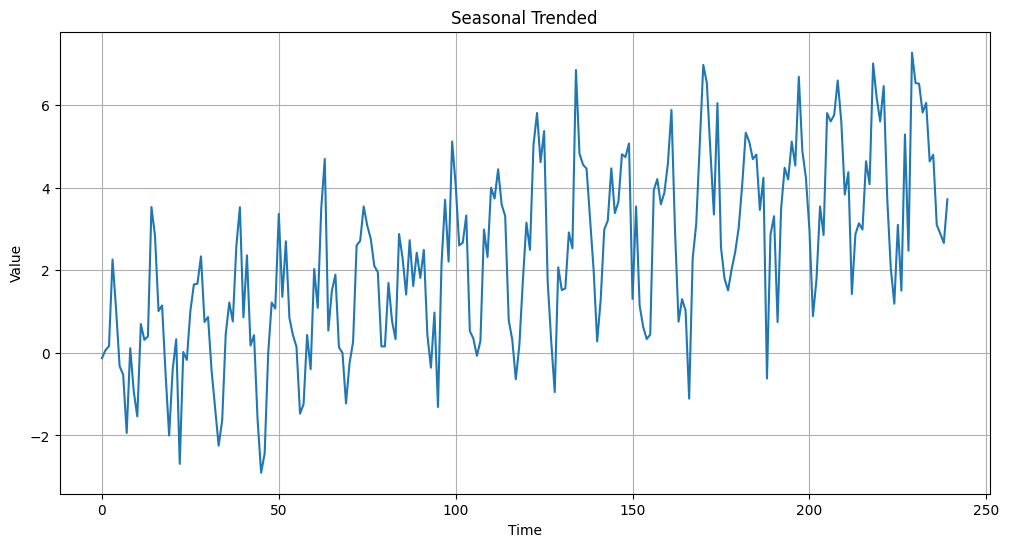

Test Seasonal Trended
ADF Statistic: -0.530 p=0.8860859361543622
KPSS: stat=2.407 p=0.01


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


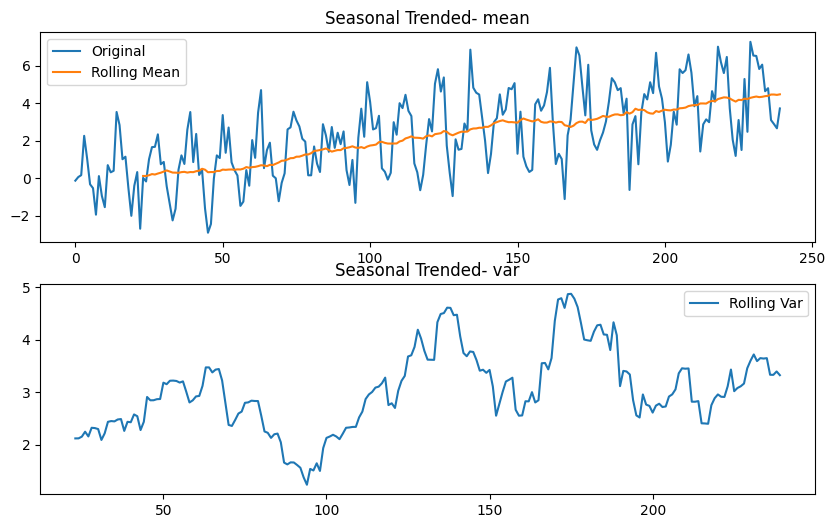

In [ ]:
#seasonal + trend
seasonal = 2 * np.sin(2*np.pi*t/12)
trend = .02 *t
seasonal_trended = pd.Series(seasonal + trend + np.random.normal(0,1,n))
plot_series(seasonal_trended,"Seasonal Trended")
print_test(seasonal_trended,"Seasonal Trended")
rolling_mean_var(seasonal_trended, window=24, title="Seasonal Trended")


In [ ]:
df.rename(columns={'Passengers': 'y'}, inplace=True)
df.head()

,y,Year,month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5


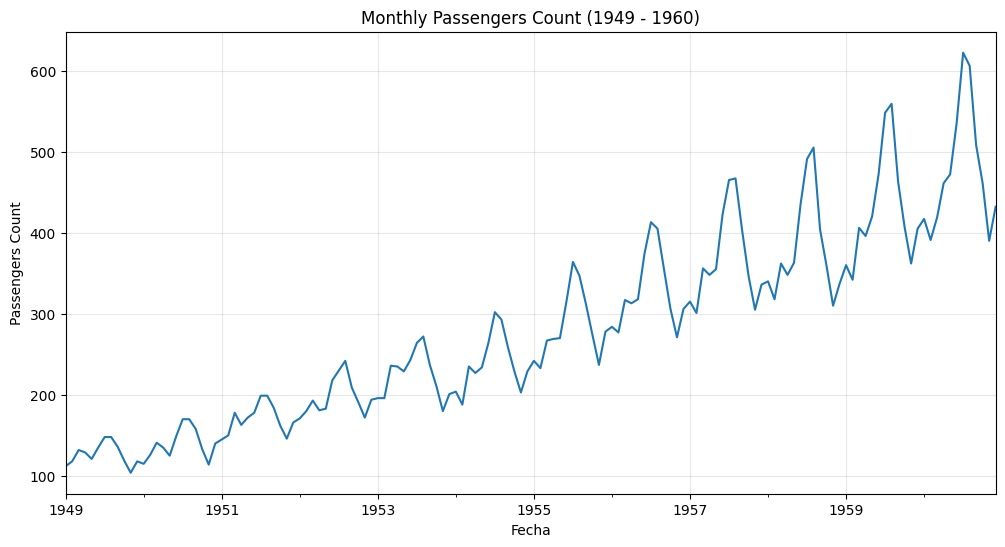

In [ ]:
ax = df['y'].plot()
ax.set_xlabel('Fecha')
ax.set_ylabel('Passengers Count')
ax.set_title('Monthly Passengers Count (1949 - 1960)')
ax.grid(True, alpha=.3)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

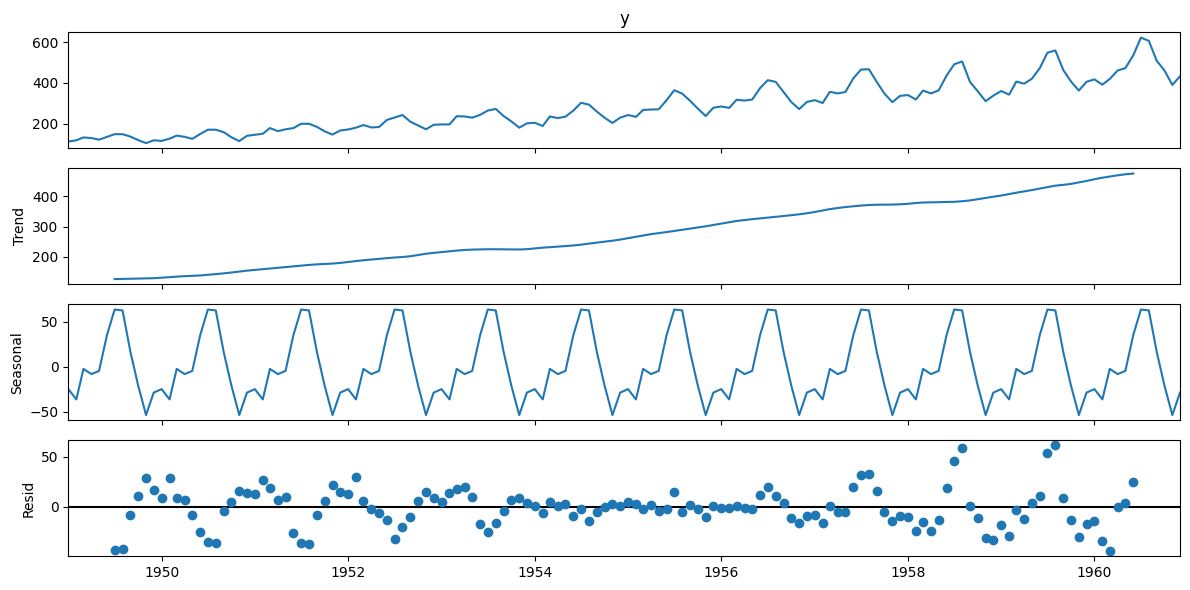

In [ ]:
decomp = seasonal_decompose(df['y'], model="additive" , period=12)
decomp.plot()
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an AR(1) model
model = AutoReg(df['y'], lags=1)
model_fit  =model.fit()



# Print the model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Fri, 24 Oct 2025   AIC                           1414.212
Time:                        01:41:46   BIC                           1423.100
Sample:                    02-01-1949   HQIC                          1417.823
                         - 12-01-1960                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7055      7.084      1.935      0.053      -0.178      27.589
y.L1           0.9589      0.023     41.106      0.000       0.913       1.005
                                    Roots           

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


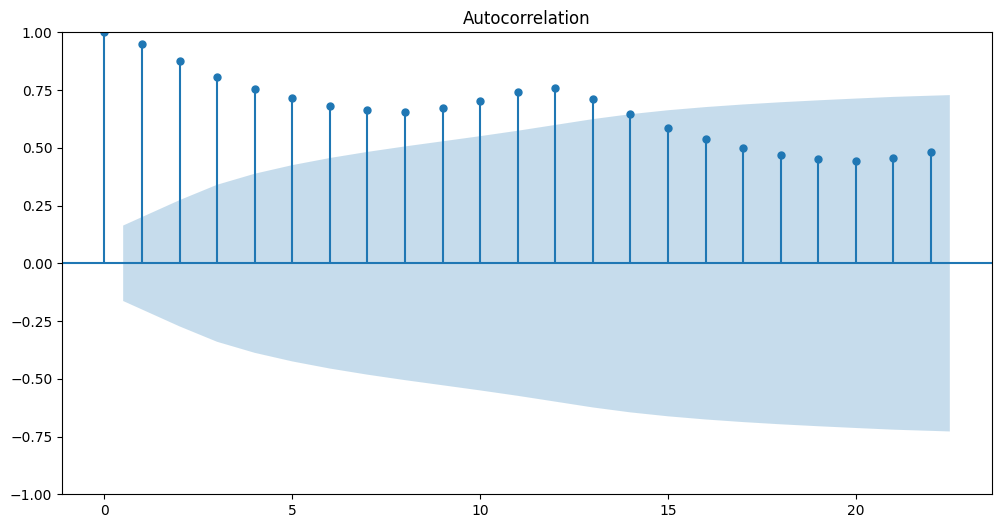

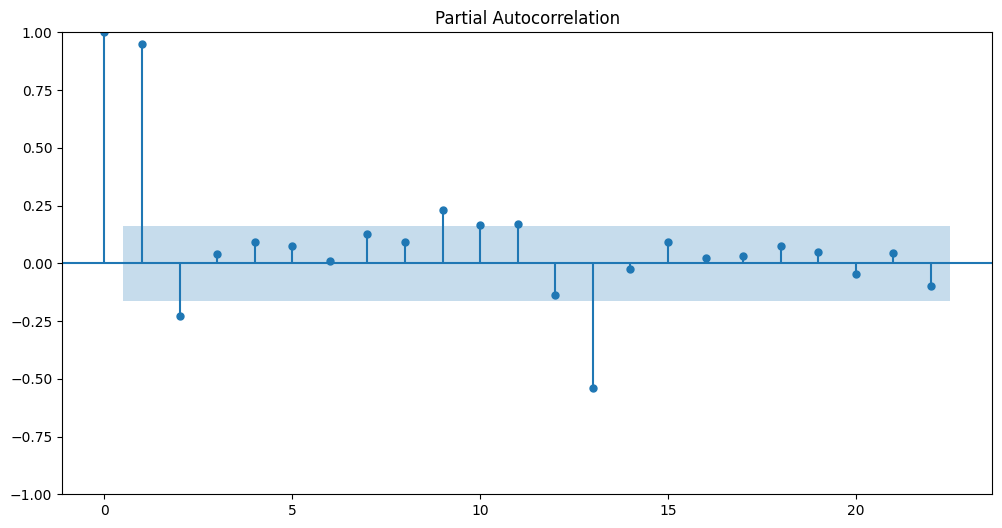

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot ACF and PACF
plot_acf(df['y'], )
plot_pacf(df['y'],)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['y'], order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Fri, 24 Oct 2025   AIC                           1618.863
Time:                        02:18:41   BIC                           1627.772
Sample:                    01-01-1949   HQIC                          1622.483
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6500     11.649     24.092      0.000     257.818     303.482
ma.L1          0.9642      0.030     32.239      0.000       0.906       1.023
sigma2      4205.2148    586.727      7.167      0.0